# Program to predict the crop damage which determine the outcome of the Harvest season using Classification Methods

## Machine Learning in Agriculture

   Recently we have observed the emerging concept of smart farming that makes agriculture more efficient and effective with the help of high-precision algorithms. The mechanism that drives it is Machine Learning — the scientific field that gives machines the ability to learn without being strictly programmed. It has emerged together with big data technologies and high-performance computing to create new opportunities to unravel, quantify, and understand data intensive processes in agricultural operational environments.

   Machine learning is everywhere throughout the whole growing and harvesting cycle. It begins with a seed being planted in the soil — from the soil preparation, seeds breeding and water feed measurement — and it ends when neural networks pick up the harvest determining the ripeness with the help of computer vision.

## The Toxic Pesticides

Though, many of us don't appreciate much, but a farmer's job is real test of endurance and determination. Once the seeds are sown, he works days and nights to make sure that he cultivates a good harvest at the end of season. A good harvest is ensured by several factors such as availability of water, soil fertility, protecting crops from rodents, timely use of pesticides & other useful chemicals and nature. While a lot of these factors are difficult to control for, the amount and frequency of pesticides is something the farmer can control.

Pesticides are also special, because while they protect the crop with the right dosage. But, if you add more than required, they may spoil the entire harvest. A high level of pesticide can deem the crop dead / unsuitable for consumption among many outcomes. This data is based on crops harvested by various farmers at the end of harvest season. To simplify the problem, you can assume that all other factors like variations in farming techniques have been controlled for.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading training data
df_train=pd.read_excel(r"C:\Users\arunp\Downloads\train_agriculture.xlsx")
df_train

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


###### Attributes Description:


      ID      -       UniqueID
    
      Estimated_Insects_Count    -  Estimated insects counts per square meter
        
      Crop_Type      -     Catagery of crop(0,1) 
    
      Soil_Type      -      Catagery of soil(0,1)
        
      Pesticide_use_Category   -   Types of Pesticides uses(1-never,2-Previously used,3-Currently using)  
    
      Number_Doses_Week      -     Number of doses per week
        
      Number_Weeks_Used     -     Number of  weeks used
    
      Number_Weeks_Quit     -     Number of weeks quit
        
      Season            -       Season Catagory(1,2,3) 
    
      Crop_Damage       -       Crop Damage Category(0-Alive,1-Damage due to other causes,2-Damage Due to Pesticides )
        
        
      

# Basis Statistics

In [6]:
df_train.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [3]:
df_train.shape

(4599, 10)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [5]:
df_train.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

# finding Missing values

In [7]:
df_train.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [8]:
df_train["Number_Weeks_Used"].value_counts()

20.0    209
30.0    194
25.0    165
40.0    133
35.0    128
       ... 
62.0      5
59.0      5
65.0      3
66.0      3
64.0      1
Name: Number_Weeks_Used, Length: 63, dtype: int64

###### Observation:

dropping column with NaN values may lead to loss of data.

since column "Number_Weeks_Used" has a continious value we will fill the missing data with the mean value.

In [9]:
df_train["Number_Weeks_Used"].mean()

28.89102718306471

In [10]:
df_train["Number_Weeks_Used"].fillna(df_train["Number_Weeks_Used"].mean(),inplace=True)

In [11]:
df_train.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

# Data Analysis and EDA

In [12]:
df_train["ID"]

0       F00000001
1       F00000003
2       F00000004
3       F00000005
4       F00000006
          ...    
4594    F00008078
4595    F00008079
4596    F00008080
4597    F00008082
4598    F00008083
Name: ID, Length: 4599, dtype: object

###### column "ID" is not much useful for our program.so lets drop it

In [13]:
df_train.drop(columns=["ID"],inplace=True)

In [14]:
df_train.columns

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

### UNIVARIATE ANALYSIS

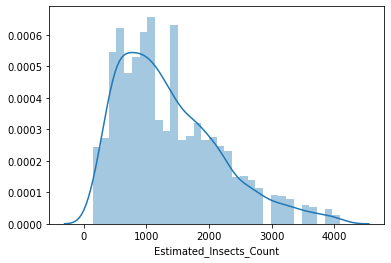

In [15]:
#displacement graph for Estimated_Insects_Count
sns.distplot(df_train["Estimated_Insects_Count"])

###### Observation:

Estimated insects count is higher at 500 - 1500

The graph shows Right Skewed Distribution. 

Hence it is Positively skewed

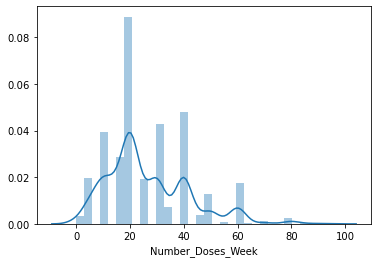

In [16]:
#displacement graph for Number_Doses_Week
sns.distplot(df_train["Number_Doses_Week"])

###### Observation:

The Displacement graph of number of pesticide doses per week to sow is normally distributed

In [17]:
#exploring column "Crop_Type"
df_train["Crop_Type"].unique()

array([1, 0], dtype=int64)

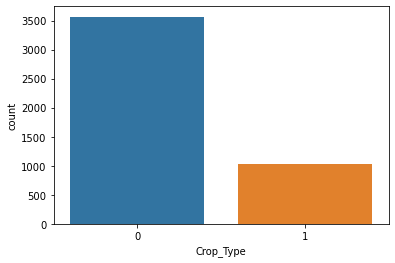

In [18]:
#Graphical visuvalisation
sns.countplot(df_train["Crop_Type"])

###### observation :

The crop type "0" has been used more when compared with crop type "1"

In [19]:
#exploring column Soil_Type
df_train["Soil_Type"].unique()

array([0, 1], dtype=int64)

In [20]:
df_train["Soil_Type"].value_counts()

0    2407
1    2192
Name: Soil_Type, dtype: int64

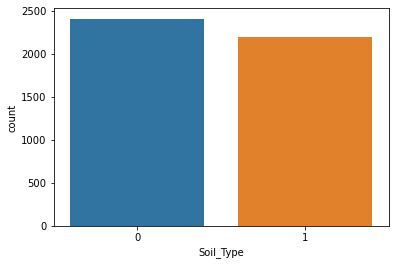

In [21]:
#Graphical visuvalisation
sns.countplot(df_train["Soil_Type"])

###### Observation 

soil Type "0" is listed more than the soil_Type "1" 

In [22]:
#exploring column Soil_Type
df_train["Pesticide_Use_Category"].unique()

array([1, 3, 2], dtype=int64)

In [23]:
df_train["Pesticide_Use_Category"].value_counts()

2    3205
3    1349
1      45
Name: Pesticide_Use_Category, dtype: int64

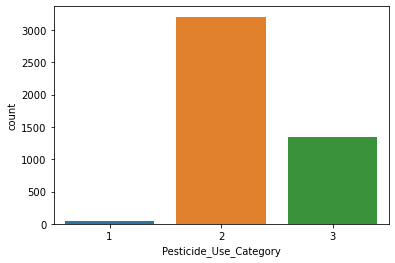

In [24]:
#Graphical visuvalisation
sns.countplot(df_train["Pesticide_Use_Category"])

###### Observation

i)The pesticide of catagery 2 is used more 

ii)The pesticide of catagery 1 is used less than the other two catagery 

In [25]:
#exploring column Season
df_train["Season"].unique()

array([1, 2, 3], dtype=int64)

In [26]:
df_train["Season"].value_counts()

2    2327
1    1379
3     893
Name: Season, dtype: int64

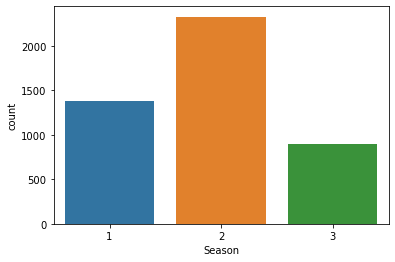

In [27]:
#Graphical visuvalisation
sns.countplot(df_train["Season"])

###### Observation

the crops harvested were seen more in Season "2", 

followed by Season "1" and season "3"

In [28]:
#exploring column Crop_Damage
df_train["Crop_Damage"].unique()

array([0, 1, 2], dtype=int64)

In [29]:
df_train["Crop_Damage"].value_counts()

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

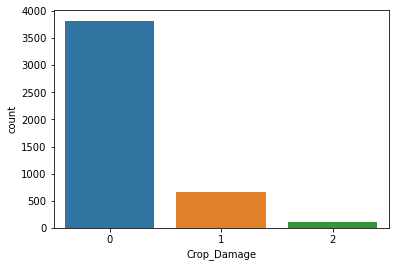

In [30]:
#Graphical visuvalisation
sns.countplot(df_train["Crop_Damage"])

###### Observation

The crop damage "0" represents - the crop is alive

The crop damage "1" represents - the crop is damaged due to other causes

The crop damage "2" represents - the crop is damaged due to Pesticides

the Graph shows that the reason for crops damage is more due to other causes rather than over usage of Pesticides 

# BIVARIATE ANALYSIS

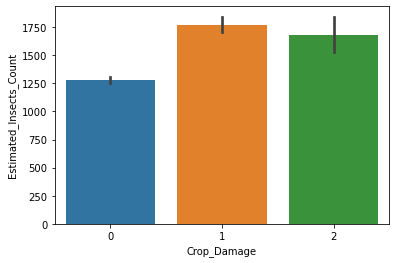

In [31]:
#scatterplot between crop damage vs Estimated insects counts
sns.barplot(x="Crop_Damage",y="Estimated_Insects_Count",data=df_train)

###### observation:

Estimated insect counts per square meter is high in the region where the Crop damage is due to other causes.we can infer that the other major cause for the crop damage is insects

Estimated insect counts per square meter is low in the region where the crops are alive



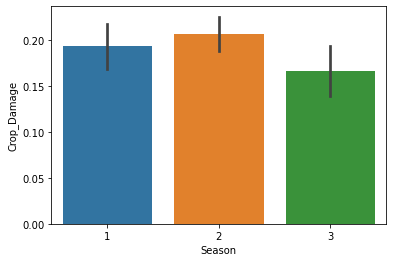

In [32]:
#scatterplot between crop damage vs Estimated insects counts
sns.barplot(x="Season",y="Crop_Damage",data=df_train)

Observation:
    
    The crop damage is high in season 2 whereas
    
    the crop damage is low in season 3
    

# CORRELATION

In [33]:
cor=df_train.corr()
cor

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.427904,0.246719,-0.009482,0.202312
Crop_Type,-0.036911,1.000000,-0.175019,0.349662,-0.163832,-0.002128,-0.273475,-0.000549,0.021772
Soil_Type,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.093539,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.027111,0.349662,0.021661,1.000000,-0.005985,0.368106,-0.569467,0.008487,0.199195
Number_Doses_Week,-0.122509,-0.163832,0.050099,-0.005985,1.000000,0.099705,-0.032381,-0.003768,-0.018363
Number_Weeks_Used,0.427904,-0.002128,-0.093539,0.368106,0.099705,1.000000,-0.446200,-0.010590,0.231925
Number_Weeks_Quit,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,-0.446200,1.000000,0.004861,-0.152918
Season,-0.009482,-0.000549,0.011052,0.008487,-0.003768,-0.010590,0.004861,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.231925,-0.152918,-0.016196,1.000000


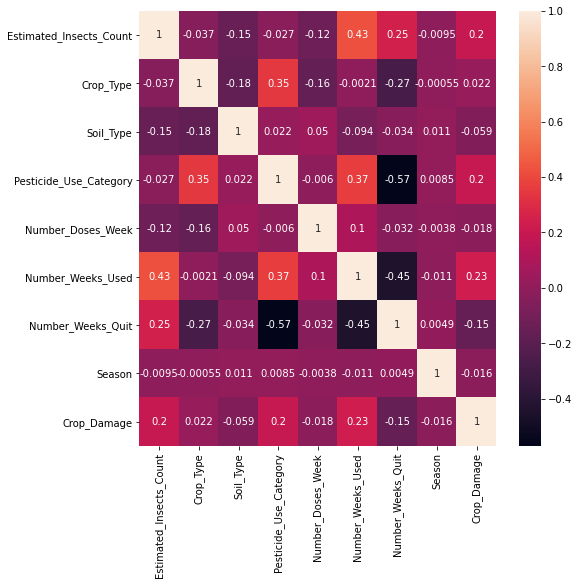

In [34]:
#visuvalization of correlation using Heatmap
plt.figure(figsize=(8,8))
sns.heatmap(cor,annot=True)
plt.show()

###### KEY OBSERVATION:

from the above result it is clear that some columns making positive correlation while some has negative correlation to the target variable 

columns making positive correlation

1)Estimated_Insects_Count

2)Crop_Type

3)Pesticide_Use_Category

4)Number_Weeks_Used


columns making negative correlation

1)Soil_Type

2)Number_Weeks_Quit

3)Season

4)Number_Doses_Week

                 
                  




# DATA CLEANING

## finding outliers

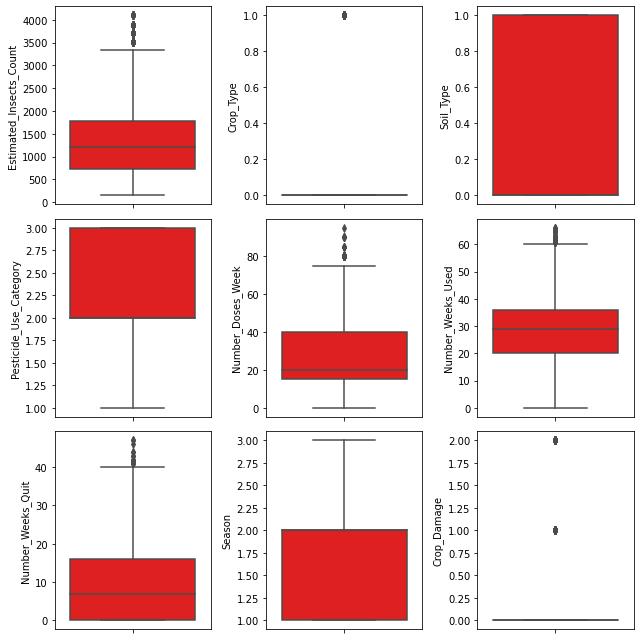

In [35]:
#Plotting Outliers
collist=df_train.columns.values
ncol=3
nrow=3
plt.figure(figsize=(3*nrow,3*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df_train[collist[i]],color="red",orient="v")
    plt.tight_layout()               

###### Observation:

Outliers present in 

1)Estimated_Insects_Count

2)Crop_Type

3)Number_Doses_Week
        
4)Number_Weeks_Used

5)Number_Weeks_Quit
      
6)Crop_Damage

## Treating Outliers

In [36]:
#Removing Outliers
#Z-score Techinique
from scipy.stats import zscore
z=np.abs(zscore(df_train))
z


array([[1.44286807, 1.85681868, 0.95429408, ..., 0.94782668, 1.28702725,
        0.42765624],
       [1.41708065, 1.85681868, 0.95429408, ..., 0.94782668, 0.15207762,
        1.77233374],
       [1.35813798, 1.85681868, 0.95429408, ..., 0.94782668, 0.15207762,
        1.77233374],
       ...,
       [1.11008649, 0.53855555, 1.04789501, ..., 1.83218282, 0.15207762,
        0.42765624],
       [1.11008649, 0.53855555, 1.04789501, ..., 1.52329287, 0.15207762,
        0.42765624],
       [1.11008649, 0.53855555, 1.04789501, ..., 0.80254967, 0.15207762,
        0.42765624]])

In [37]:
threshold=3
print(np.where(z>3))

(array([   7,    9,   14,   22,   23,  100,  103,  112,  149,  165,  166,
        167,  179,  185,  186,  197,  207,  222,  223,  242,  248,  252,
        264,  265,  290,  296,  305,  316,  325,  346,  351,  355,  361,
        374,  375,  377,  384,  453,  458,  466,  480,  510,  517,  522,
        557,  595,  612,  634,  693,  702,  703,  704,  705,  706,  807,
        819,  855,  856,  911,  944,  978,  980,  998, 1017, 1019, 1067,
       1097, 1178, 1212, 1291, 1307, 1324, 1326, 1327, 1329, 1337, 1339,
       1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1347, 1348, 1349,
       1406, 1443, 1457, 1489, 1523, 1589, 1652, 1654, 1737, 1807, 1868,
       2019, 2043, 2090, 2136, 2139, 2140, 2165, 2170, 2171, 2174, 2183,
       2185, 2188, 2190, 2190, 2191, 2192, 2193, 2194, 2237, 2392, 2553,
       2565, 2585, 2589, 2590, 2590, 2591, 2615, 2663, 2671, 2696, 2702,
       2710, 2714, 2716, 2723, 2767, 2779, 2792, 2796, 2797, 2804, 2806,
       2814, 2828, 2829, 2834, 2841, 2842, 2851, 2

In [38]:
df_train.shape

(4599, 9)

In [39]:
df_new=df_train[(z<3).all(axis=1)]
df_new.shape

(4370, 9)

In [40]:
#Percentage loss
loss=(4599-4370)/4599*100
loss

4.979343335507719

###### Observation:

The Outliers loss percentange is minimal.so proceeding further

## Finding Skewness

In [41]:
#checking for skewness
df_new.skew()

Estimated_Insects_Count    0.789806
Crop_Type                  1.308548
Soil_Type                  0.079724
Pesticide_Use_Category     0.753578
Number_Doses_Week          0.711083
Number_Weeks_Used          0.275330
Number_Weeks_Quit          0.813382
Season                     0.141605
Crop_Damage                2.003206
dtype: float64

###### Observation:

All the columns are positively skewed

# Seperating Target Variable


In [42]:
x_l=df_new.drop(["Crop_Damage"],axis=1)
y=df_new["Crop_Damage"]

In [43]:
x_l.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,0,1,0,0.0,0,1
1,209,1,0,1,0,0.0,0,2
2,257,1,0,1,0,0.0,0,2
3,257,1,1,1,0,0.0,0,2
4,342,1,0,1,0,0.0,0,2


In [44]:
y

0       0
1       1
2       1
3       1
4       1
       ..
4594    1
4595    1
4596    0
4597    0
4598    0
Name: Crop_Damage, Length: 4370, dtype: int64

## Removing Skewness

In [45]:
#Skewness treatment
#treating using log
threshold=0.55
import numpy as np
for i in x_l.columns:
    if x_l[i].skew()>0.65:
        x_l[i]=np.log1p(x_l[i])
    

# Scaling Input Variable

In [46]:
# Algorithms requires all features to be on common scale. 
#using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x_l)
x


array([[-2.6958167 ,  1.8489469 , -0.9609451 , ..., -2.44567922,
        -1.29813915, -1.28855889],
       [-2.53419472,  1.8489469 , -0.9609451 , ..., -2.44567922,
        -1.29813915,  0.14755495],
       [-2.21841971,  1.8489469 , -0.9609451 , ..., -2.44567922,
        -1.29813915,  0.14755495],
       ...,
       [ 1.11600538, -0.54084841,  1.04064217, ..., -1.8474572 ,
         1.28920135,  0.14755495],
       [ 1.11600538, -0.54084841,  1.04064217, ..., -0.73647346,
         1.20120558,  0.14755495],
       [ 1.11600538, -0.54084841,  1.04064217, ...,  0.37451028,
         0.94613364,  0.14755495]])

# preparing dataset for model training


## splitting the testing and training data

In [47]:
#importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [49]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3496, 8), (874, 8), (3496,), (874,))

# finding best model

Popular algorithms that can be used for multi-class classification include:

1)k-Nearest Neighbors.

2)Decision Trees.

3)Support Vector Machine

4)Random Forest Regressor

5)Gradient Boosting

In [50]:
#importing our model library
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
from sklearn.svm import SVC
svc=SVC()
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()


## using Algorithms via for loop

In [51]:
model=[knn,dt,svc,rf,gb]
for m in model:
    m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    print("the score of ",m,"is")
    print("training accuracy score  :",accuracy_score(y_train,pred_train)*100)
    print("testing accuracy score  :",accuracy_score(y_test,pred_test)*100)
    print("*********************************************************************")
    print("\n\n")
    

the score of  KNeighborsClassifier() is
training accuracy score  : 87.98627002288329
testing accuracy score  : 84.09610983981693
*********************************************************************



the score of  DecisionTreeClassifier() is
training accuracy score  : 99.9141876430206
testing accuracy score  : 75.74370709382151
*********************************************************************



the score of  SVC() is
training accuracy score  : 86.29862700228833
testing accuracy score  : 85.58352402745996
*********************************************************************



the score of  RandomForestClassifier() is
training accuracy score  : 99.9141876430206
testing accuracy score  : 84.32494279176201
*********************************************************************



the score of  GradientBoostingClassifier() is
training accuracy score  : 87.90045766590389
testing accuracy score  : 85.58352402745996
*********************************************************************




In [52]:
#importing 
#classification Report
#confusion_matrix
#f1_score
#roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [53]:
model=[knn,dt,svc,rf,gb]
for m in model:
    m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    print("Report of ",m, "is")
    print("confussion matrix \n",confusion_matrix(y_test,pred_test))
    print("classification_report  \n",classification_report(y_test,pred_test))
   
   


Report of  KNeighborsClassifier() is
confussion matrix 
 [[706  44]
 [ 95  29]]
classification_report  
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       750
           1       0.40      0.23      0.29       124

    accuracy                           0.84       874
   macro avg       0.64      0.59      0.60       874
weighted avg       0.81      0.84      0.82       874

Report of  DecisionTreeClassifier() is
confussion matrix 
 [[629 121]
 [ 86  38]]
classification_report  
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       750
           1       0.24      0.31      0.27       124

    accuracy                           0.76       874
   macro avg       0.56      0.57      0.56       874
weighted avg       0.79      0.76      0.77       874

Report of  SVC() is
confussion matrix 
 [[739  11]
 [115   9]]
classification_report  
               precision    recall  f1-score   

# Observation

##### From all the above we infer that the "Random Forest Classifier" performs well.

It gives the Best results when compared with other models.

        the score of  RandomForestClassifier() is

        training accuracy score  : 99.914

        testing accuracy score  : 84.096



In [54]:
#Hyper parameter Tuning
#RandomForestClassifier
#using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
parameters={"n_estimators" :[1,10,100,1000], "random_state": list(range(0,10))}
rf=RandomForestClassifier()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)



{'n_estimators': 100, 'random_state': 4}


In [55]:
#cross validating 
#Random forest classifier
#cross-validating for checking upper/lower cutting
from sklearn.model_selection import cross_val_score
rf.fit(x_train,y_train)
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)
accuracy=accuracy_score(y_test,pred_test)
for i in range(2,10):
    cr=cross_val_score(rf,x,y,cv=i)
    cross=cr.mean()
    print("At cv : ",i,"\ncross val score is : ",cross*100,"\naccuracy score is: ",accuracy*100)
    print("******************************************************************************")
    print("\n\n")

        



At cv :  2 
cross val score is :  84.16475972540044 
accuracy score is:  84.32494279176201
******************************************************************************



At cv :  3 
cross val score is :  83.75315201842312 
accuracy score is:  84.32494279176201
******************************************************************************



At cv :  4 
cross val score is :  83.04358991115625 
accuracy score is:  84.32494279176201
******************************************************************************



At cv :  5 
cross val score is :  83.56979405034328 
accuracy score is:  84.32494279176201
******************************************************************************



At cv :  6 
cross val score is :  81.39584181250848 
accuracy score is:  84.32494279176201
******************************************************************************



At cv :  7 
cross val score is :  81.48824175824176 
accuracy score is:  84.32494279176201
********************************************

###### Observation

At cv:3

the accuracy score and the cross validation score is very nearer.

so we are going in good approach.



In [56]:
#using RandomForestClassification with best Result
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=4,n_estimators=100)
rf.fit(x_train,y_train)
rf_test_pred=rf.predict(x_test)
rf_train_pred=rf.predict(x_train)
rf_test_acc=accuracy_score(y_test,rf_test_pred)
rf_train_acc=accuracy_score(y_train,rf_train_pred)
print("training accuracy : ",rf_train_acc*100)
print("final accuracy : ",rf_test_acc*100)


training accuracy :  99.9141876430206
final accuracy :  83.98169336384439


In [57]:
import pickle
filename="agriculture_training.pkl"
pickle.dump(rf,open(filename,"wb"))


# USING THE TEST DATASET

In [58]:
#importing test dataset
df_test=pd.read_excel(r"C:\Users\arunp\Downloads\test_agriculture.xlsx")
df_test

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1


In [59]:
df_test.shape

(1199, 9)

In [60]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1199 non-null   object 
 1   Estimated_Insects_Count  1199 non-null   int64  
 2   Crop_Type                1199 non-null   int64  
 3   Soil_Type                1199 non-null   int64  
 4   Pesticide_Use_Category   1199 non-null   int64  
 5   Number_Doses_Week        1199 non-null   int64  
 6   Number_Weeks_Used        1080 non-null   float64
 7   Number_Weeks_Quit        1199 non-null   int64  
 8   Season                   1199 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 84.4+ KB


In [61]:
df_test.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
dtype: object

In [62]:
df_test.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season'],
      dtype='object')

# finding Missing values

In [63]:
df_test.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

###### observation

dropping column with NaN values may lead to loss of data.

since column "Number_Weeks_Used" has a continious value we will fill the missing data with the mean value.

In [64]:
df_test["Number_Weeks_Used"].mean()

29.033333333333335

In [65]:
#filling missing values with mean
df_test["Number_Weeks_Used"].fillna(df_test["Number_Weeks_Used"].mean(),inplace=True)

In [66]:
#rechecking missing values
df_test.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

# Exploring Attributes

In [67]:
df_test["ID"]

0       F00000002
1       F00000007
2       F00000011
3       F00000013
4       F00000014
          ...    
1194    F00003133
1195    F00003135
1196    F00003138
1197    F00003149
1198    F00003150
Name: ID, Length: 1199, dtype: object

###### observation:

    column "ID" is not much useful for our program.
    
    so lets drop it

In [68]:
df_test.drop(columns=["ID"],inplace=True)

# DATA CLEANING

## finding outliers

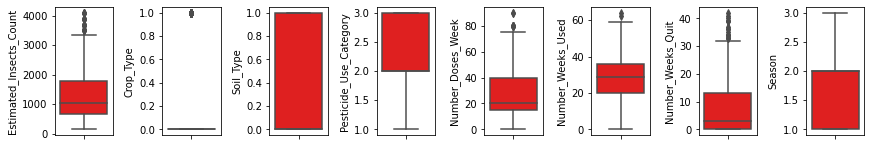

In [69]:
#Plotting Outliers
collist=df_test.columns.values
ncol=30
nrow=15
plt.figure(figsize=(3*nrow,ncol))
for i in range (0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df_test[collist[i]],color="red",orient="v")
    plt.tight_layout()               

###### Observation:

Outliers present in 

1)Estimated_Insects_Count

2)Crop_Type

3)Number_Doses_Week
        
4)Number_Weeks_Used

5)Number_Weeks_Quit
      

## Treating Outliers

In [70]:
#Removing Outliers
#Z-score Techinique
from scipy.stats import zscore
z=np.abs(zscore(df_test))
z


array([[1.30318366e+00, 2.03615391e+00, 1.09360445e+00, ...,
        5.85986262e-16, 7.96003797e-01, 1.72804130e-01],
       [1.04035366e+00, 2.03615391e+00, 1.09360445e+00, ...,
        2.39438582e+00, 7.96003797e-01, 1.72804130e-01],
       [7.84627185e-01, 2.03615391e+00, 9.14407397e-01, ...,
        2.39438582e+00, 7.96003797e-01, 1.72804130e-01],
       ...,
       [1.85564227e-01, 4.91122009e-01, 1.09360445e+00, ...,
        1.32227276e+00, 1.79995135e+00, 1.28629553e+00],
       [9.08507165e-02, 4.91122009e-01, 1.09360445e+00, ...,
        4.92072401e-01, 2.31665722e-01, 1.28629553e+00],
       [9.08507165e-02, 4.91122009e-01, 1.09360445e+00, ...,
        5.85986262e-16, 1.46134850e+00, 1.63190379e+00]])

In [71]:
threshold=3
print(np.where(z>3))

(array([  50,   83,  129,  136,  179,  255,  280,  281,  282,  501,  502,
        503,  535,  574,  613,  630,  751,  775,  827,  829,  853,  868,
        870,  871,  883,  890,  895,  897,  902,  904,  910,  911,  912,
        913,  914,  915,  916, 1030, 1152], dtype=int64), array([4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 4, 4], dtype=int64))


In [72]:
df_test.shape

(1199, 8)

In [73]:
df_new1=df_test[(z<3).all(axis=1)]
df_new1.shape

(1160, 8)

In [74]:
#Percentage loss
loss=(1199-1160)/1199*100
loss

3.252710592160134

###### Observation:

    The percentage dataloss is very minimal. so proceeding with next step

## Finding Skewness

In [75]:
#checking for skewness
df_new1.skew()

Estimated_Insects_Count    1.013185
Crop_Type                  1.515496
Soil_Type                  0.148878
Pesticide_Use_Category     0.069452
Number_Doses_Week          0.645208
Number_Weeks_Used          0.223826
Number_Weeks_Quit          1.032108
Season                     0.159728
dtype: float64

##### Observation:

Most the columns are positively skewed

## Removing Skewness

In [77]:
#Skewness treatment
#treating using log
threshold=0.55
import numpy as np
for i in df_new1.columns:
    if df_new1[i].skew()>0.65:
        df_new1[i]=np.log1p(df_new1[i])
    

In [78]:
#Rechecking Skewness
df_new1.skew()

Estimated_Insects_Count   -0.319397
Crop_Type                  1.515496
Soil_Type                  0.148878
Pesticide_Use_Category     0.069452
Number_Doses_Week          0.645208
Number_Weeks_Used          0.223826
Number_Weeks_Quit          0.199224
Season                     0.159728
dtype: float64

###### Data Cleaning is completed .

# Scaling Input Variable

In [80]:
# Algorithms requires all features to be on common scale. 
#using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
test_df=sc.fit_transform(df_new1)
test_df


array([[-2.50728813,  2.01084019,  1.07710212, ...,  0.0069657 ,
        -1.00542808,  0.1775195 ],
       [-1.34703014,  2.01084019,  1.07710212, ..., -2.39257857,
        -1.00542808,  0.1775195 ],
       [-0.71622468,  2.01084019, -0.92841708, ..., -2.39257857,
        -1.00542808,  0.1775195 ],
       ...,
       [ 0.16747508, -0.49730456,  1.07710212, ..., -1.31815576,
         1.45148655, -1.28292465],
       [ 0.26937643, -0.49730456,  1.07710212, ...,  0.50009822,
         0.3797593 , -1.28292465],
       [ 0.26937643, -0.49730456,  1.07710212, ...,  0.0069657 ,
         1.34825506,  1.63796365]])

# Loading the Model

In [79]:
fitted_model=pickle.load(open("agriculture_training.pkl","rb"))
fitted_model

RandomForestClassifier(random_state=4)

# Predicting over Test Data

In [81]:
prediction=fitted_model.predict(test_df)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)